In [1]:
import numpy as np
import matplotlib.pyplot as plt
r = 0.73

A classic example of a chaos is the logistic map which is a model of population growth. Here is the map of the graph:

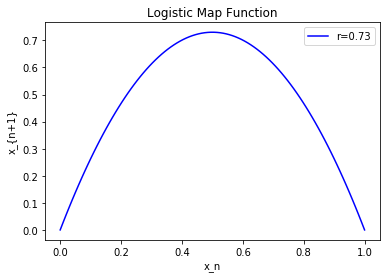

In [2]:
xn = np.linspace(0,1,100)
xmap = 4*r*xn*(1-xn)

plt.figure()
plt.title("Logistic Map Function")
plt.plot(xn,xmap,"b-", label="r=%.2f" % r)
plt.xlabel("x_n")
plt.ylabel("x_{n+1}")
plt.legend(loc="upper right")
plt.show()

This map demonstrates long term convergence to a solution of a single value or an osculation to multiple values due to the value of the initial growth constant. At a value the map will begin to act chaotic with which the result values are unpredictable. This is called a map function because this function maps an X value to a Y below I will explore another map which is the sine map.

## Mapping the Sine Map 

In [3]:
r=0.73

    The above is an inital condition that the user can change, as s/he pleases. It is also important to notice the importance of this value as it is related to the choas of the function! 
    
        

First, we are going to look at a sine map function, by plotting it. We can see the curve that will be half of the     logistic wave.

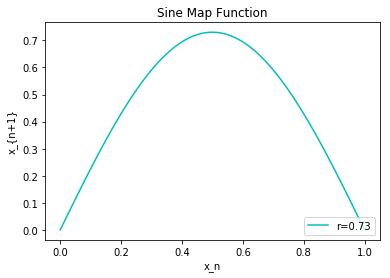

In [4]:
xn = np.linspace(0,1,100)
sinemap = r*np.sin(np.pi*xn)

plt.figure()
plt.title("Sine Map Function")
plt.plot(xn, sinemap, "c-", label="r=%.2f" % r)
plt.xlabel("x_n")
plt.ylabel("x_{n+1}")
plt.legend(loc="lower right")
plt.show()

    As we can see while mapping the two functions above, they seem to be very simlar. Both prabola's reaching a max at the same point. The sine function does seem to get a little skinnier the higher you go. 

## Trajectory of our Sine Function

    Next we will plot the trajectories of the Sine function to see when Sine gets chaotic, and before it becomes chaotic we 
    will discover how many periods the sine function has. 

In [5]:
def sinemap_func(xn, r): #make it a function so we don't need to keep re-typing it.
    #input: x_n value of x at the nth iteration
    #output: x_n+1 this would be the next value of x

    x_npo = r*np.sin(np.pi*xn) #our sine function
    
    return x_npo

In [6]:
def trajectory(x_0=0, r=0, N=30, linetype="k.", ymin=0, ymax=0):
    xn_all = [] #this list will store all values of x_n
    xn_all.append(x_0) #do not forget to add the initial value
    n_all = []
    n_all.append(0)

    n = 0 
    
    while n < N:
        xn = xn_all[n]
        x_nplusone = sinemap_func(xn, r) #find the x_n+1
        xn_all.append(x_nplusone)
        n_all.append(n+1)

        n = n + 1

    plt.figure()
    plt.title("Trajectory of x_n")
    plt.plot(n_all,xn_all,linetype, label="x_0 = %.3f, r = %.3f" % (x_0, r))
    plt.ylim(ymin,ymax)
    plt.xlabel("n")
    plt.ylabel("x_{n+1}")
    plt.legend(loc="upper right")
    plt.show()
    
    return xn_all

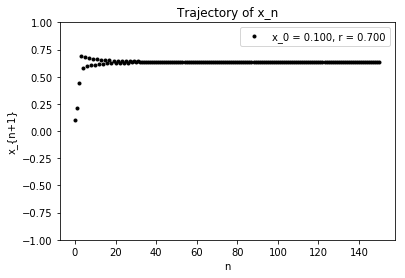

In [7]:
xn=trajectory(0.1, 0.7, 150, "k.", -1, 1) #order of imputs are x_0, r, N, linetype, ymin and ymax

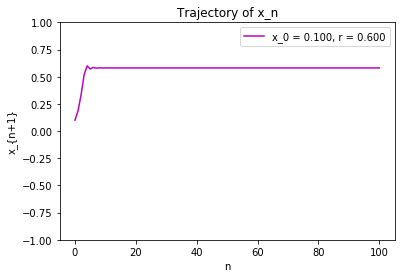

We can see the fixed point for a period one is  0.5807817051530346 We know this because the lines (as the approach infinity),  converge on the single point, 0.5807817051530346


In [8]:
r=0.6
xn=trajectory(0.1, r, 100, "m-", -1, 1)  #order of imputs are x_0, r, N, linetype, ymin and ymax
print("We can see the fixed point for a period one is ", xn[-1], "We know this because the lines (as the approach infinity),  converge on the single point,", xn[-1])

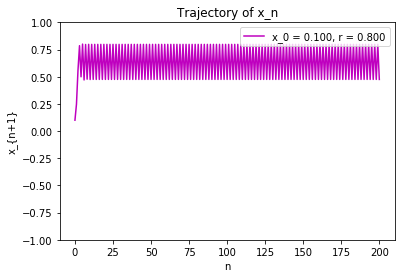

we can see that the fixed points for a period two are  0.4751634347793167  and  0.7975659894354805


In [9]:
r=0.8
xn=trajectory(0.1, r, 200, "m-", -1, 1)  #order of imputs are x_0, r, N, linetype, ymin and ymax

print("we can see that the fixed points for a period two are ", xn[-1], " and ", xn[-2])

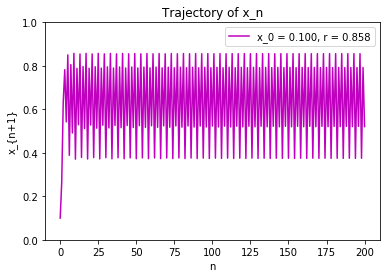

In [10]:
r=0.858
xn=trajectory(0.1, r, 200, "m-", 0, 1)  #order of imputs are x_0, r, N, linetype, ymin and ymax
    

    We can now see that the function becomes chaotic at 0.858, the period is not constant, it is constantly jumping around. Moreover, the definition of a chaotic system. One might have to zoom in to the graph to see this as the variations are 
    small and can be difficult to notice.  

## Looking at the fixed points

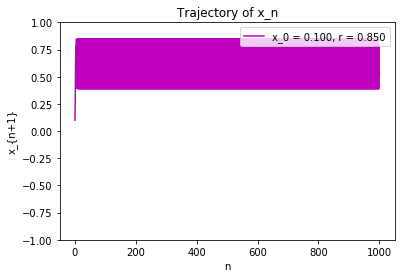

In [11]:
r=0.85
xn=trajectory(0.1, r, 1000, "m-", -1, 1)  #order of imputs are x_0, r, N, linetype, ymin and ymax

fp2 = xn[-1]
fp3 = xn[-2]
fp1 = xn[-3]
fp4 = xn[-4]

In [12]:
print("We can see that our fixed points, for a period 4 are", fp1, fp2, fp3, fp4) #Fixed points and attractors are the same.

We can see that our fixed points, for a period 4 are 0.3864154524282126 0.507243496788919 0.7964556100855504 0.8497799271448199


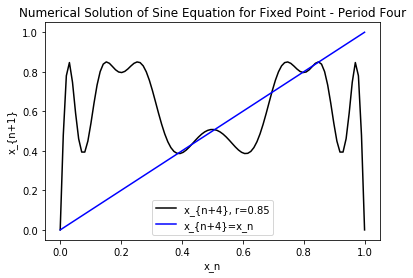

In [13]:
x0=0.1
r=0.85 #This needs to be consistant w/the value associated with the period four. 

xn = np.linspace(0,1,100)
function1 = r*np.sin(np.pi*xn)
function2 = r*np.sin(np.pi*function1)
function3 = r*np.sin(np.pi*function2)
function4 = r*np.sin(np.pi*function3)
 
x_np4 = xn
plt.figure()
plt.title("Numerical Solution of Sine Equation for Fixed Point - Period Four")
plt.plot(xn,function4,"k-",label="x_{n+4}, r="+str(r))
plt.plot(xn,x_np4,"b-",label="x_{n+4}=x_n")
plt.xlabel("x_n")
plt.ylabel("x_{n+1}")
plt.legend()
plt.show()

## Bifurcation Diagrams

In [14]:
def traj_end(x0=0, r=0, Ntotal=1000, Nlast=100, plotattractors=True):
    xn_end = [] #list to store all values of x_n after n=Ntotal-Nlast
    xn = x0
    n = 0 #loop variable
    while n < Ntotal:
        x_npo2 = sinemap_func(xn, r) #calculate x_n+1
        if n > Ntotal-Nlast-1:
            xn_end.append(x_npo2)
        xn = x_npo2
        n = n + 1

    return xn_end

In [15]:
#create a bifurcation diagram
def plot_bifurcation(x0=0.5, Ntotal = 1000, Nend = 100, rmin = 0.7, rmax = 1, ymin = 0,ymax = 1, plotattractors=True):

    xoffset = 0.03 #offset for text on plot
    
    plt.figure()
    plt.title("x_n after the initial transient")

    for r in np.linspace(rmin,rmax,2000):
        xn=traj_end(x0,r,Ntotal,Nend)
        rh = r*np.ones(Nend)
        plt.plot(rh,xn,"b,")

    if(plotattractors):
        for i in range(0,len(bifurcationpoints)):
            print("r_%d: %.3f" % (i+1,bifurcationpoints[i]))
            plt.axvline(x=bifurcationpoints[i])
            if(i<3):
                plt.text(bifurcationpoints[i]-xoffset, xoffset, "r_%d" % (i+1))
            else:
                plt.text(bifurcationpoints[i]+0.5*xoffset, xoffset, "r_%d" % (i+1))                
    plt.xlabel("r")
    plt.ylabel("x_n")
    plt.ylim(ymin, ymax)
    plt.show()

In [16]:
bifurcationpoints=[0.718, 0.834, 0.858, 0.864] #Where the attractors "split, or double"
#for i in range(0,len(bifurcationpoints)):
  #  print("r_%d: %.3f" % (i+1,bifurcationpoints[i]))

r_1: 0.718
r_2: 0.834
r_3: 0.858
r_4: 0.864


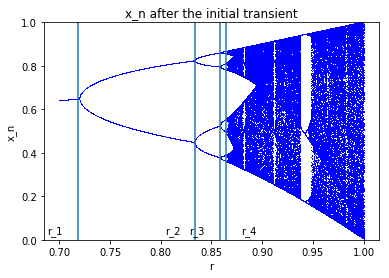

In [17]:
plot_bifurcation()

Note that r_1, r_2, r_3 and r_4 are all four bifurcation points, they are located at 0.718, 0.834, 0.858 and 0.864 respectively. 

These varried from the logistic map whose points where r_1: 0.750, r_2: 0.862, r_3: 0.886, and r_4: 0.891.

## Feigenbaum Number

We can use to fine the Feigenbaum Delta Number:

$$\delta = \frac{\gamma_{n}-\gamma_{n-1}}{\gamma_{n+1}-\gamma_{n}}$$



In [18]:
gamm = bifurcationpoints[2]
gamm_minus1 = bifurcationpoints[1]
gamm_plus1 = bifurcationpoints[3]

delta = (gamm - gamm_minus1) / (gamm_plus1 - gamm)
print(delta)


4.0


    We can notice that this is very close to the feigenbaum number we got for the logistic map, with not much research we can see that the figuenbaum number is a constant

## Comparing Trajectories, and inital conditions 

    Now we can look into the onset of chaos and how that can look on some other trajectory maps. 

In [19]:
##This is a copied version of trajectory, this function just doesnt plot!
def trajectorypart2(x_0=0, r=0, N=30, linetype="k.", ymin=0, ymax=0):
    xn_all = [] #this list will store all values of x_n
    xn_all.append(x_0) #do not forget to add the initial value
    n_all = []
    n_all.append(0)

    n = 0 
    
    while n < N:
        xn = xn_all[n]
        x_nplusone = sinemap_func(xn, r) #find the x_n+1
        xn_all.append(x_nplusone)
        n_all.append(n+1)

        n = n + 1
    
    return xn_all

    Here we are graphing the trajectories of  Xn_1 and Xn_2 on the same axes. With this graph we are able to curve fit to the graph and find our Lypunov exponent 

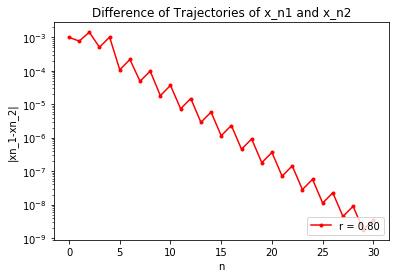

In [20]:
x0_1=0.4
x0_2=x0_1+0.001
r=0.8
N=30

xn_1=np.array(trajectorypart2(x0_1, r, N))
xn_2=np.array(trajectorypart2(x0_2, r, N))
dx = np.abs(xn_2-xn_1)
n=np.linspace(0,N,N+1)

plt.figure()
plt.title("Difference of Trajectories of x_n1 and x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

In [21]:
def expfunc(n, A, lamb):
    return A*np.exp(lamb*n)

    Here we are using a linear fit to curve fit with our graph to get that Lypunov exponent. 

In [22]:
def linear(n,lamb,B):
    return lamb*n+B

In [23]:
from scipy.optimize import curve_fit

In [24]:
r = 0.7
n_last_20=n[-25:]
dx_last_20=dx[-25:]

parameters, stats = curve_fit(linear,n_last_20,np.log(dx_last_20))
print("lambda=",parameters[0])

dx_model = expfunc(n_last_20, np.exp(parameters[1]), parameters[0])

lambda= -0.4628417177673263


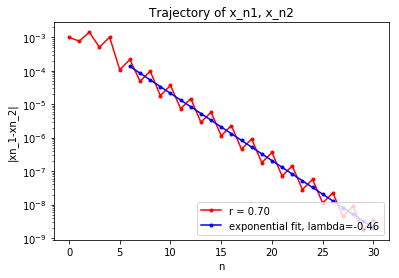

In [25]:
plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.semilogy(n_last_20,dx_model,"b.-", label="exponential fit, lambda=%.2f" % parameters[0])
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

    The Lyapunov exponent of this map is -0.46, with an initial condition r set to 0.70(Non-Chaotic)

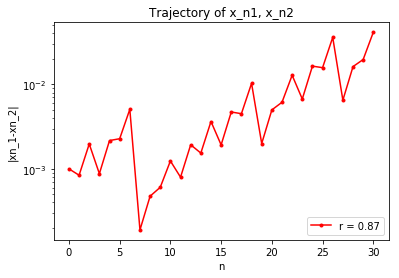

In [26]:
x0_1=0.4
x0_2=x0_1+0.001
r=0.87
N=30

xn_1=np.array(trajectorypart2(x0_1, r, N))
xn_2=np.array(trajectorypart2(x0_2, r, N))
dx = np.abs(xn_2-xn_1)
n=np.linspace(0,N,N+1)

plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

lambda= 0.16062425823250104


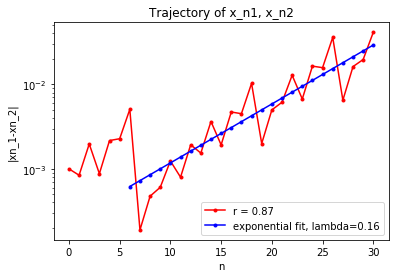

In [27]:
n_last_20=n[-20:]
dx_last_20=dx[-20:]

n_last_20=n[-25:]
dx_last_20=dx[-25:]

parameters, stats = curve_fit(linear,n_last_20,np.log(dx_last_20))
print("lambda=",parameters[0])

dx_model = expfunc(n_last_20, np.exp(parameters[1]), parameters[0])

plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.semilogy(n_last_20,dx_model,"b.-", label="exponential fit, lambda=%.2f" % parameters[0])
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()


        The Lyapunov exponent of this map is 0.16, with the initial condition r set to 0.87(chaotic)

      Similarlty to the logistic map, if  λ<0 then the system is predictable (nonchaotic). If  λ>0 , the system is chaotic.